# Homework 3: Logistic Regression with Regularization

In [16]:
# Import Packages
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score, KFold

# Exploratory Data Analysis

In [2]:
# Load the breast cancer dataset
breast_cancer_data = load_breast_cancer()

# Create a DataFrame with the data and feature names
breast_cancer_df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

In [3]:
breast_cancer_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Summary statistics
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [5]:
breast_cancer_df.shape

(569, 30)

In [6]:
# Check for missing values
breast_cancer_df.isnull().sum()
# There are no empty values

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

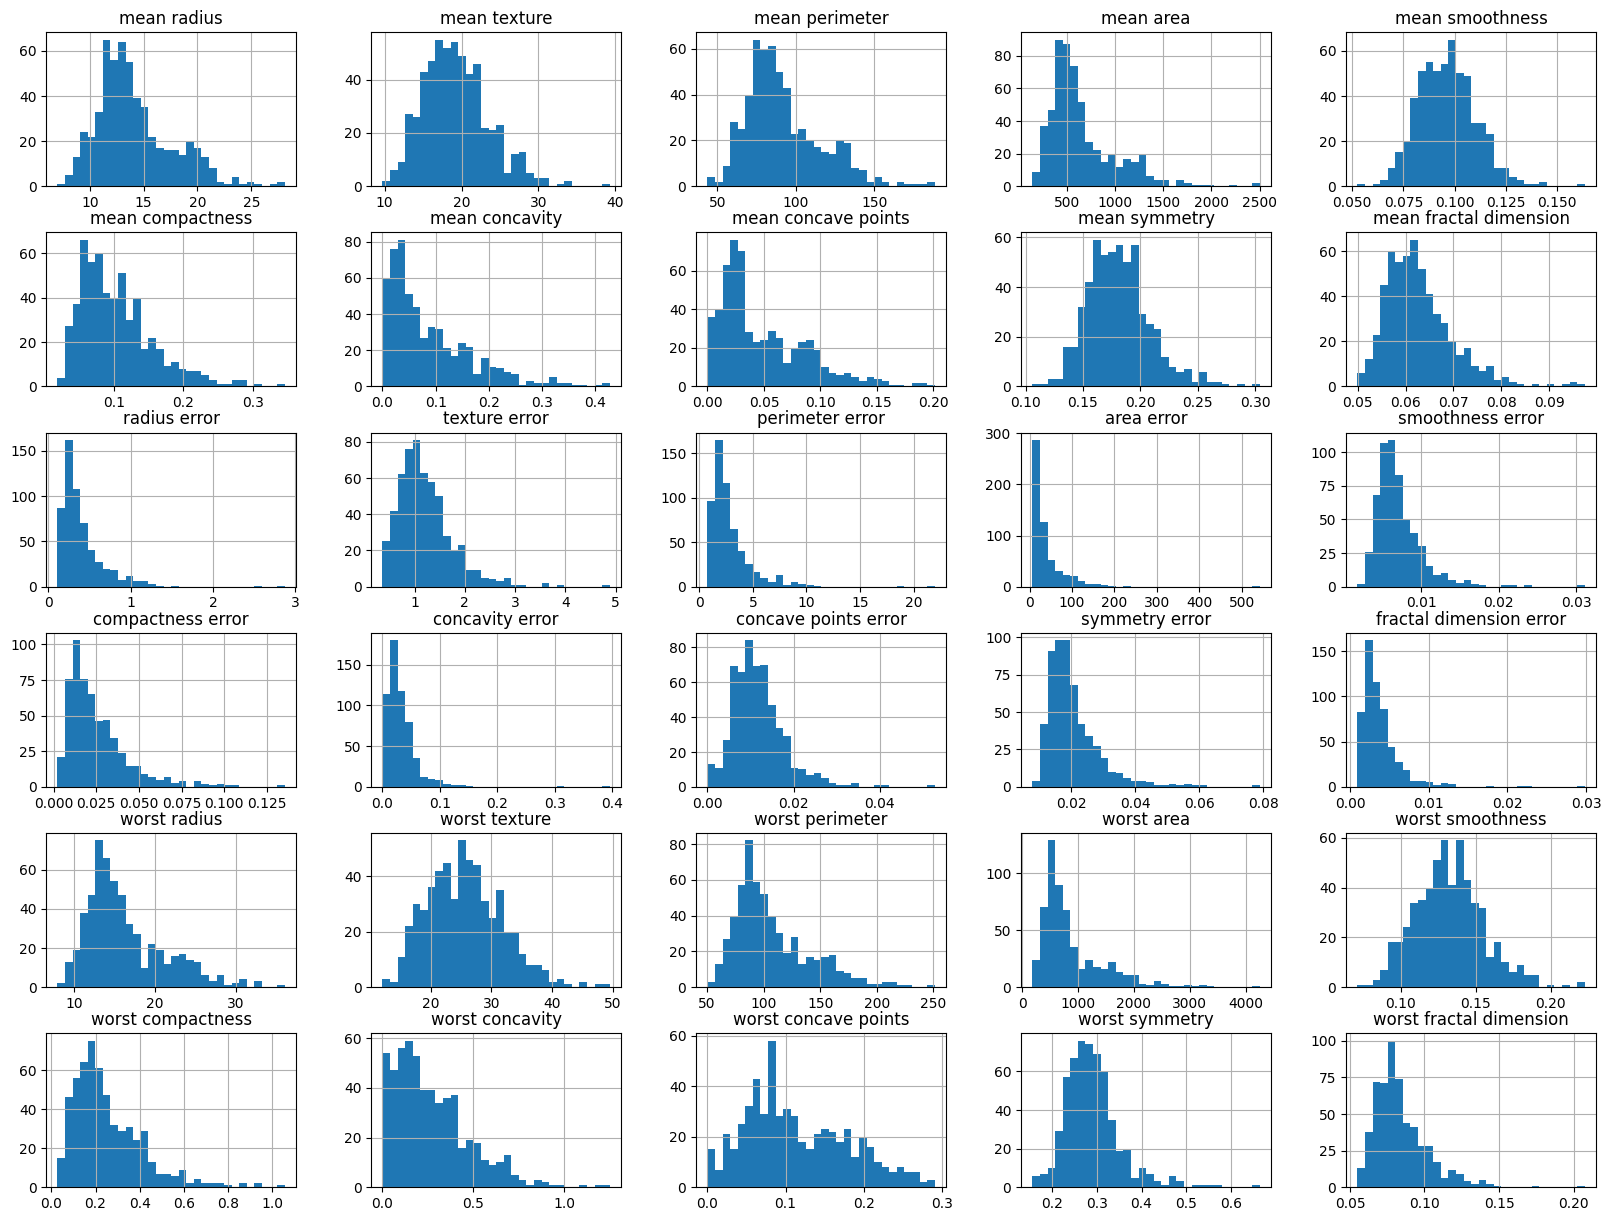

In [7]:
# Histograms for all features
breast_cancer_df.hist(bins=30, figsize=(20, 15))
plt.show()


In [10]:
# perform standard scaling

# Extract features (X) and target (y)
X = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
y = breast_cancer_data.target

# Scaler object
scaler = StandardScaler()

# Scale
X_scaled = scaler.fit_transform(X)
print("Data scaled...")

Data scaled...


In [11]:
# Prepare data for modeling. Train test split and adding bias vector

# Convert labels from 0/1 -> -1/1 for binary classification
y = np.where(y == 0, -1, 1)

X_scaled_with_bias = np.hstack([np.ones((X_scaled.shape[0], 1)), X_scaled])

# Split the scaled data set with the bias vector
X_train, X_test, y_train, y_test = train_test_split(X_scaled_with_bias, y, test_size=0.2, random_state=42)

print("Data ready ...")

Data ready ...


# Modeling

#### The idea is to explore different Feature Interactions and Regularization Parameters to find the best model

In [14]:
# Different Values for Feature Interaction and Regularization
degrees = [1, 2, 3]  # n = 1, 2, 3
lambdas = [0.1, 1, 10, 100]  # Different regularization strengths
print("Parameters Instantiated ...")

Parameters Instantiated ...


In [17]:
results = []    # Will hold score of the different models
kf = KFold(n_splits= 5, shuffle=True, random_state= 42) # 5FOLD CV
print("Results array and KFold Instantiated ...")


Results array and KFold Instantiated ...


In [20]:
for degree in degrees:

    # Transform features to desired polynomial Degree
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X_scaled)

    for alpha in lambdas:
        # Explore different Regularization values
        model = LogisticRegression(C=1/alpha, penalty='l2', solver='liblinear', random_state=42)
        
          


        # Perform 5-fold cross CV and caluclate mean score
        scores = cross_val_score(model, X_poly, y, cv=kf, scoring='accuracy')
        # Average/Stable score across cross-validation 
        mean_score = scores.mean()

        # Store results
        results.append({
            'degree' : degree,
            'lambda' : alpha,
            'mean_cv_score' : mean_score
        })

print("Modeling Complte. Techniques Applied: Explored Different Transformations, Regularization Hyperparameter, and Cross Validation ...")

Modeling Complte. Techniques Applied: Explored Different Transformations, Regularization Hyperparameter, and Cross Validation ...


In [22]:
# Convert results to a DataFrame for easy manipulation and sorting
results_df = pd.DataFrame(results)

# Find the top 5 configurations
top_5_configs = results_df.nlargest(5, 'mean_cv_score')
print(results_df)
print()
print("Top Results Obtained ....")

    degree  lambda  mean_cv_score
0        1     0.1       0.971821
1        1     1.0       0.977146
2        1    10.0       0.980640
3        1   100.0       0.968328
4        2     0.1       0.959540
5        2     1.0       0.964819
6        2    10.0       0.970098
7        2   100.0       0.956047
8        3     0.1       0.956063
9        3     1.0       0.966620
10       3    10.0       0.977146
11       3   100.0       0.978901

Top Results Obtained ....


# Results for Training

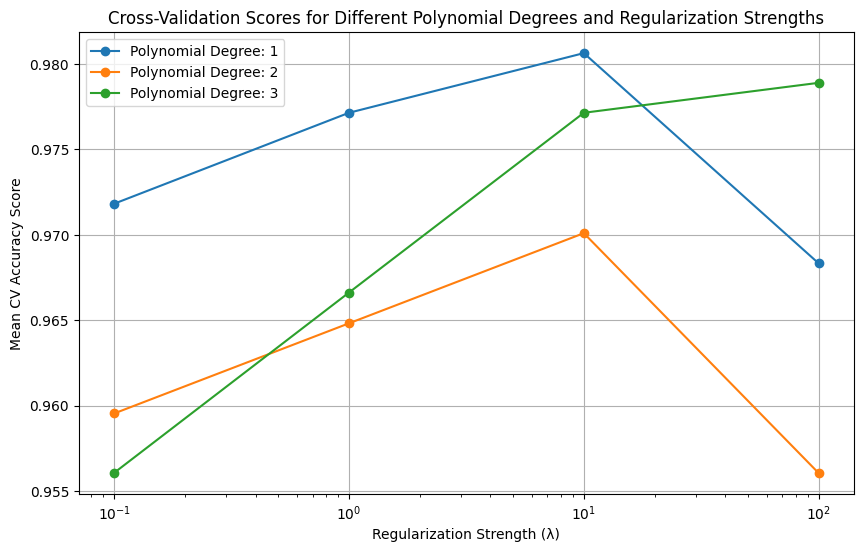

In [23]:
# Plot the results
plt.figure(figsize=(10, 6))
for degree in degrees:
    subset = results_df[results_df['degree'] == degree]
    plt.plot(subset['lambda'], subset['mean_cv_score'], marker='o', label=f'Polynomial Degree: {degree}')

plt.xscale('log')
plt.xlabel('Regularization Strength (λ)')
plt.ylabel('Mean CV Accuracy Score')
plt.title('Cross-Validation Scores for Different Polynomial Degrees and Regularization Strengths')
plt.legend()
plt.grid(True)
plt.show()

# Results for Testing

In [29]:
top_5_configs = [
    {'degree': 2, 'lambda': 10, 'mean_cv_score': 0.981},
    {'degree': 3, 'lambda': 100, 'mean_cv_score': 0.979},
    {'degree': 1, 'lambda': 1, 'mean_cv_score': 0.977},
    {'degree': 3, 'lambda': 10, 'mean_cv_score': 0.977},
    {'degree': 1, 'lambda': .1, 'mean_cv_score': 0.971}
]
print("Top 5 configurations Redeclared ...")

Top 5 configurations Redeclared ...


In [30]:
test_accuracies = []

for config in top_5_configs:
    # Transform the feature space according to the polynomial degree
    poly = PolynomialFeatures(degree=config['degree'], include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    # Train logistic regression model with the specified lambda (regularization strength)
    model = LogisticRegression(C=1/config['lambda'], penalty='l2', solver='liblinear', random_state=42)
    model.fit(X_train_poly, y_train)
    
    # Evaluate on the test set and store the accuracy
    test_accuracy = model.score(X_test_poly, y_test)
    test_accuracies.append({
        'degree': config['degree'],
        'lambda': config['lambda'],
        'test_accuracy': test_accuracy
    })

print("Top 5 Configuration Predictions Made ....")

Top 5 Configuration Predictions Made ....


In [33]:
test_accuracies_df = pd.DataFrame(test_accuracies)
sorted_test_accuracies_df = test_accuracies_df.sort_values(by='test_accuracy', ascending=False)

# Display the sorted DataFrame
print(sorted_test_accuracies_df)

   degree  lambda  test_accuracy
2       1     1.0       0.973684
3       3    10.0       0.973684
4       1     0.1       0.973684
0       2    10.0       0.964912
1       3   100.0       0.964912


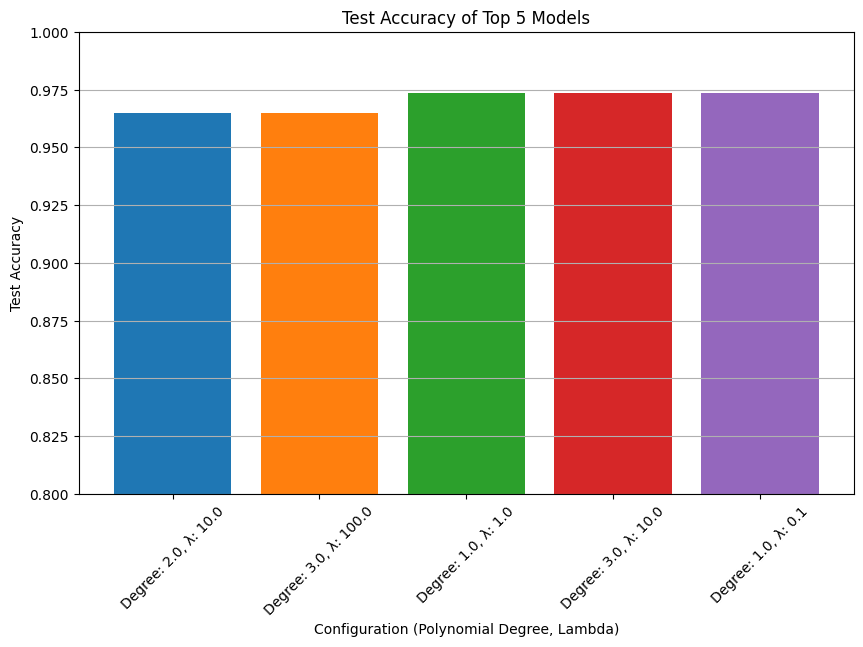

In [34]:
plt.figure(figsize=(10, 6))
for i, row in test_accuracies_df.iterrows():
    plt.bar(f"Degree: {row['degree']}, λ: {row['lambda']}", row['test_accuracy'])

plt.xlabel('Configuration (Polynomial Degree, Lambda)')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Top 5 Models')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)
plt.grid(axis='y')
plt.show()

# Conclusion

The hyperparameters was the Degree 1, and Regularization Hyper parameter 1. It is not surprising that It was not even the best model on the Test set as it was 3rd but that is not surprising as models that obtianed the highest ccuracy in train are really specific and may have overfit to the train leading them to generalize worse on unseen data.